In [0]:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 

Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

1) The data includes 'nan' and '?' as a string. Thus, convert both to numpy nan.

2) The two columns 'Date' and 'Time' are merged to 'dt'.

3) The data is converted to time-series type, by taking index to be the time.

In [0]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [0]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [0]:
df.shape

(2075259, 7)

In [0]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [0]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [0]:
for j in range(1,7):
       print(df.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [0]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all



[0, 1, 2, 3, 4, 5, 6]

In [0]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [0]:
#cross checking for missing values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [0]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [0]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import xgboost as xgb
from sklearn import model_selection, preprocessing
color = sns.color_palette()
%matplotlib inline
# result transform
def num2log(arr):
    return np.log(arr + 1)
# result retransform
def log2num(arr):
    return np.exp(arr) - 1
# treat date
def trans_date(arr): 
    return datetime.datetime.strptime(arr, '%Y-%m-%d').date()



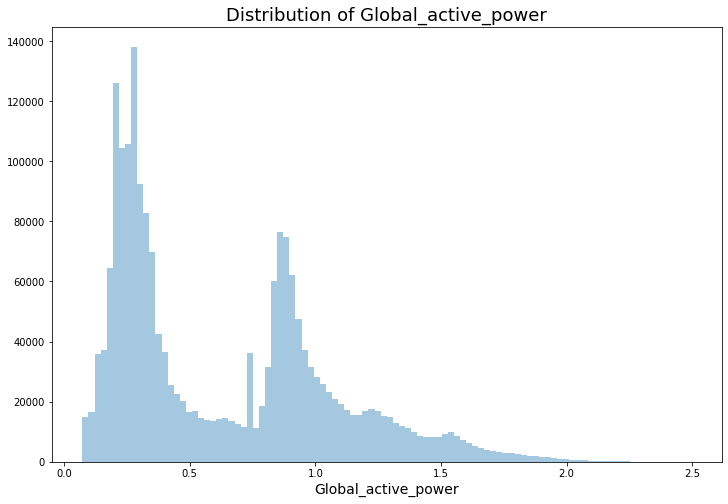

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(num2log(df.Global_active_power.values), bins=100, kde=False)
plt.xlabel('Global_active_power', fontsize=14)
plt.title('Distribution of Global_active_power', fontsize = 18)
plt.show()

In [0]:
#resampling the data - taking sum over month
df['Global_active_power'].resample('M').sum()

dt
2006-12-31    41817.648460
2007-01-31    69014.045230
2007-02-28    56491.069230
2007-03-31    58863.283615
2007-04-30    39245.548781
2007-05-31    44008.872000
2007-06-30    35729.767447
2007-07-31    29846.831570
2007-08-31    34120.475531
2007-09-30    41874.789230
2007-10-31    49278.553230
2007-11-30    55920.827230
2007-12-31    72605.261615
2008-01-31    65170.473615
2008-02-29    49334.346845
2008-03-31    55591.685615
2008-04-30    48209.992000
2008-05-31    45724.043230
2008-06-30    42945.063615
2008-07-31    35479.601230
2008-08-31    12344.063230
2008-09-30    42667.792000
2008-10-31    50743.399447
2008-11-30    59918.584535
2008-12-31    56911.416668
2009-01-31    62951.099615
2009-02-28    50291.953362
2009-03-31    54761.169230
2009-04-30    49277.707230
2009-05-31    45214.196460
2009-06-30    37149.767696
2009-07-31    27594.810460
2009-08-31    30049.032998
2009-09-30    42631.838845
2009-10-31    51089.811615
2009-11-30    55068.733615
2009-12-31    60907.18923

**DATA VISULAIZATION**

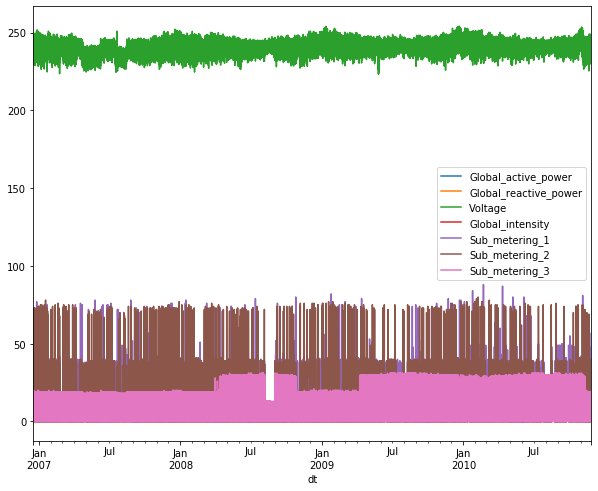

In [0]:
#default plot
df.plot(figsize = (10,8))

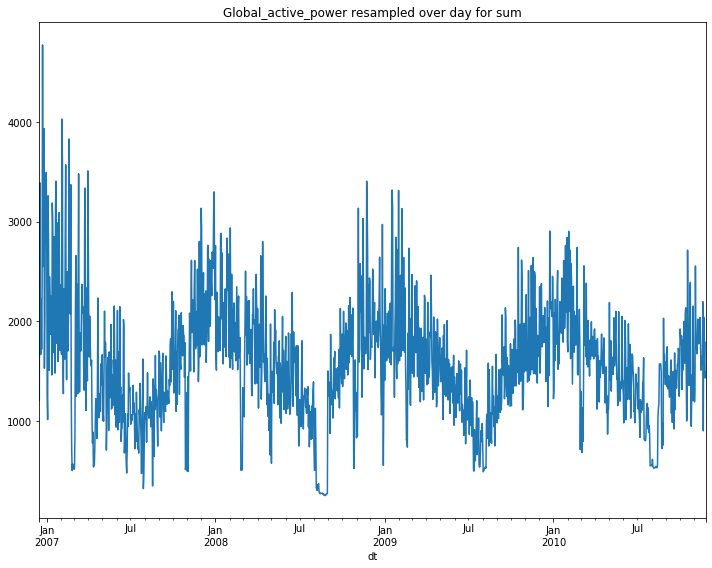

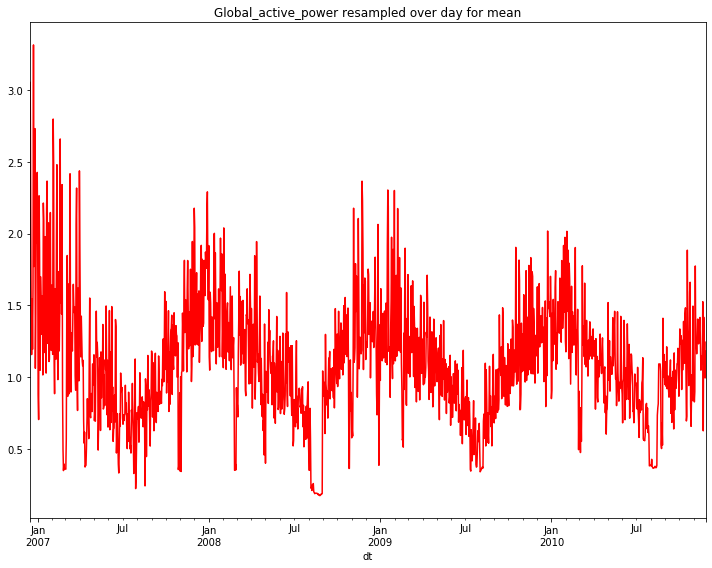

In [0]:
#resample over day, and show the sum and mean of Global_active_power.
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum', figsize=(10,8)) 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red', figsize=(10,8)) 
plt.tight_layout()
plt.show()



* It is seen that mean and sum of resampled data set, have similar structure.



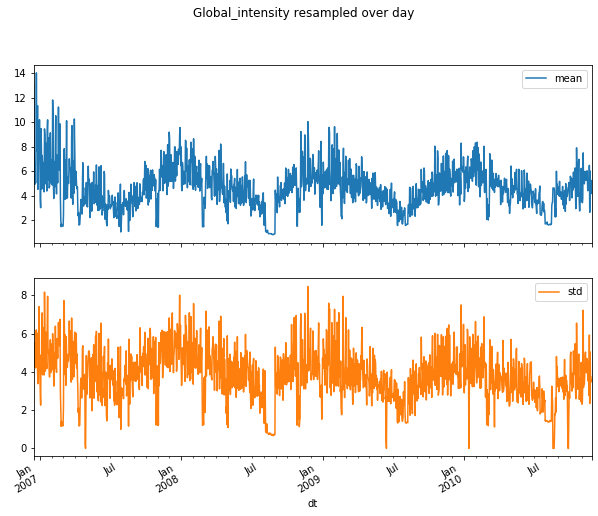

In [0]:
#mean and std of 'Global_intensity' resampled over day
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day', figsize=(10,8)) 
plt.show()

* There is a steep decrease in mean and std for the month of march, november

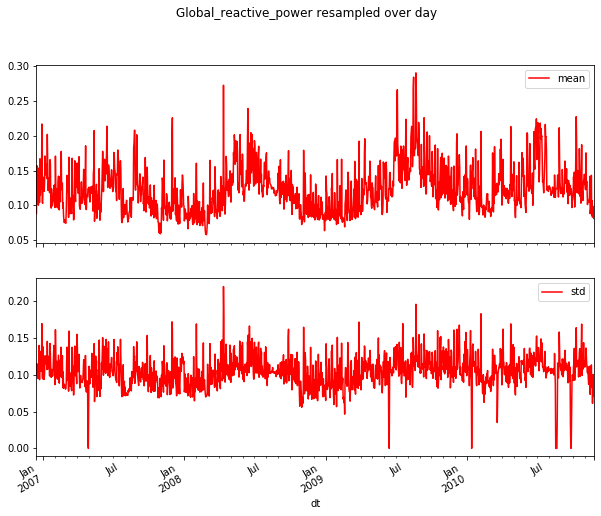

In [0]:
##mean and std of 'Global_reactive_power' resampled over day

r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red', figsize=(10,8))
plt.show()

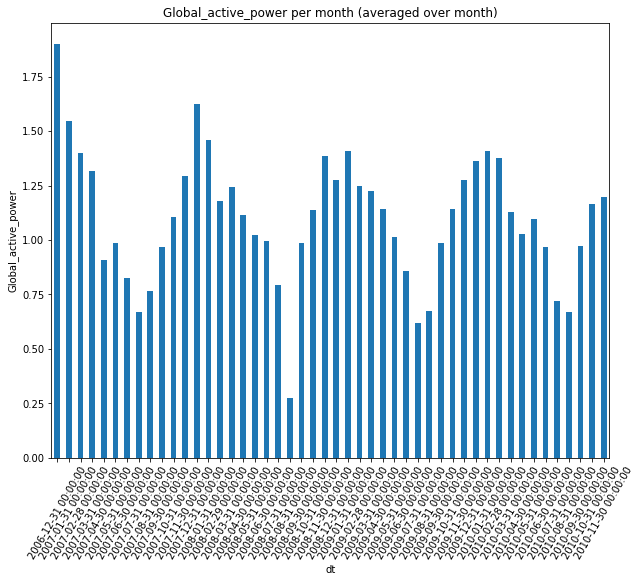

In [0]:
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

* Here we can see a pattern where the global active power is the highest for december and lowest for July

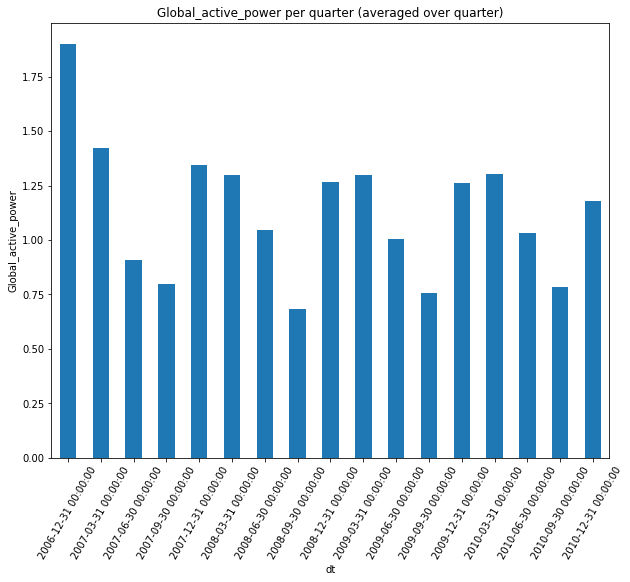

In [0]:

#mean of Global_active_power resampled over Quarter



df['Global_active_power'].resample('Q').mean().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()


* from above two plots, it can be seen that resampling over larger time inteval, will diminish the periodicity of system as we expect.

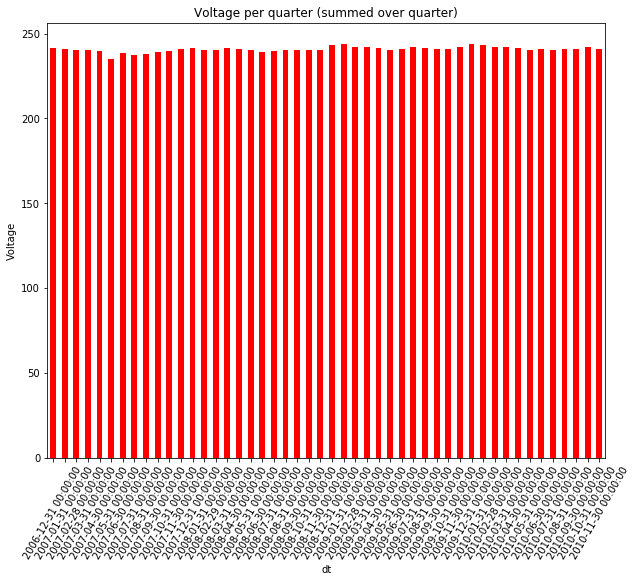

In [0]:
#mean of 'Voltage' resampled over month

df['Voltage'].resample('M').mean().plot(kind='bar', color='red', figsize = (10,8))
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()



* the mean of 'Volage' over month is pretty much constant compared to other features.

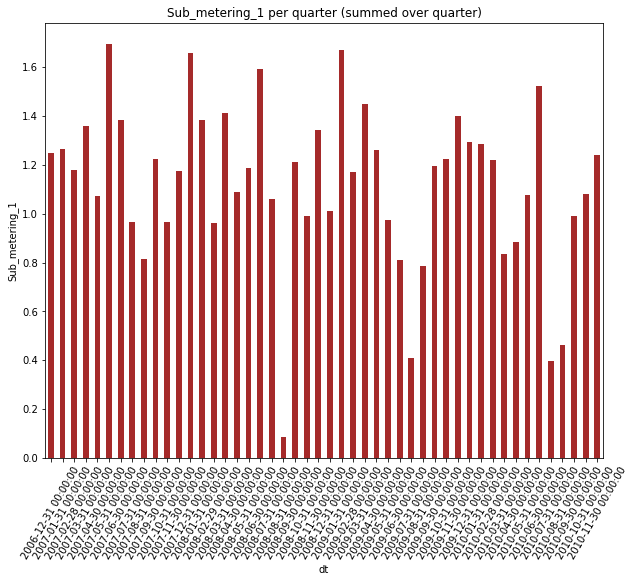

In [0]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown', figsize=(10,8))
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

# Comparing the mean of different features resampled over day:

In [0]:
# specify columns to plot
"""cols = [0, 1, 2, 3, 5, 6]
i = 1
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()"""

"cols = [0, 1, 2, 3, 5, 6]\ni = 1\nvalues = df.resample('D').mean().values\n# plot each column\nplt.figure(figsize=(15, 10))\nfor group in groups:\n\tplt.subplot(len(cols), 1, i)\n\tplt.plot(values[:, group])\n\tplt.title(df.columns[group], y=0.75, loc='right')\n\ti += 1\nplt.show()"

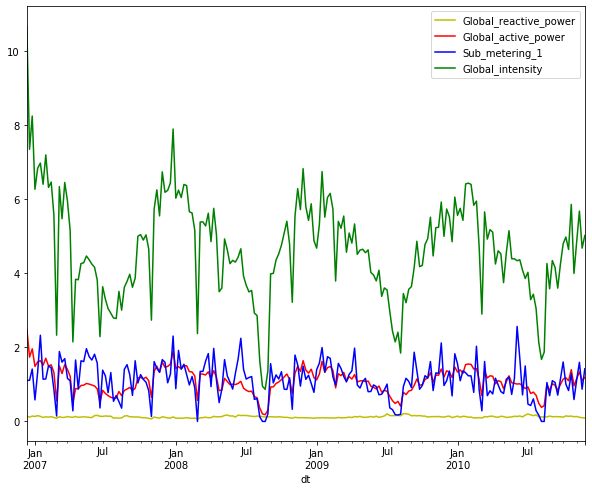

In [0]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True, figsize=(10,8))
df.Global_active_power.resample('W').mean().plot(color='r', legend=True, figsize=(10,8))
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True, figsize=(10,8))
df.Global_intensity.resample('W').mean().plot(color='g', legend=True, figsize=(10,8))
plt.show()

* It can be seen that the mean of global reactive power is comparitively
 constant 
* Sub metering 1 and global active power are fairly related to each other

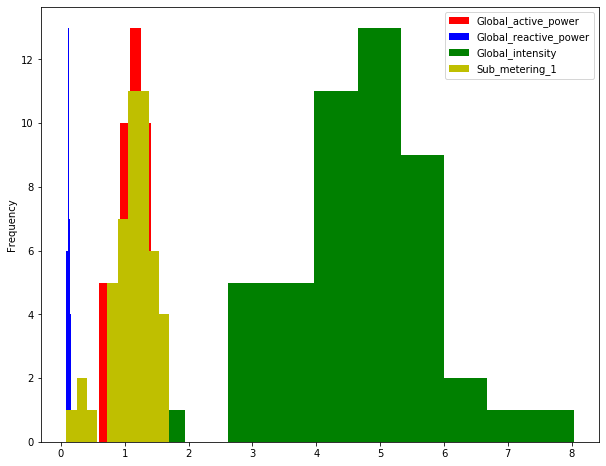

In [0]:
# Hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True, figsize=(10,8))
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True, figsize=(10,8))
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True, figsize=(10,8))
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True, figsize=(10,8))
plt.show()



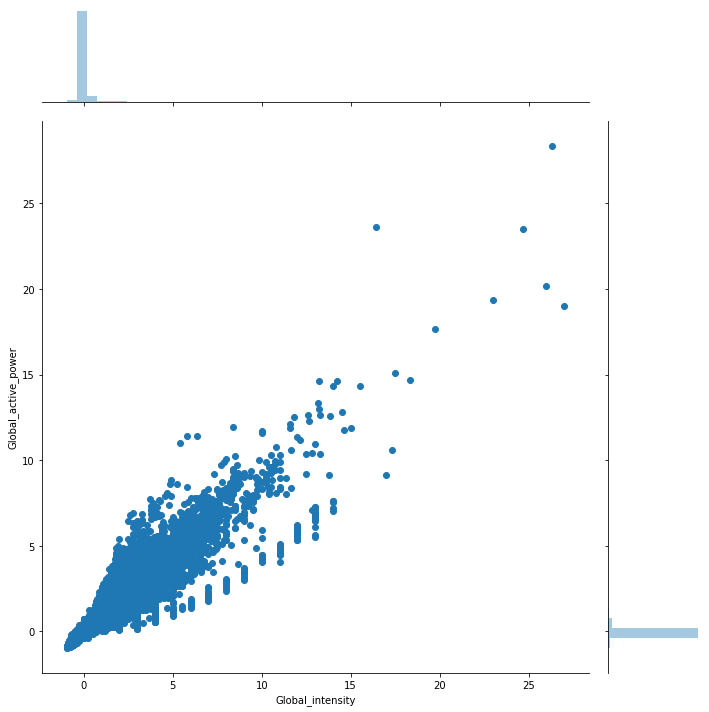

In [0]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns, height=10)  

plt.show()

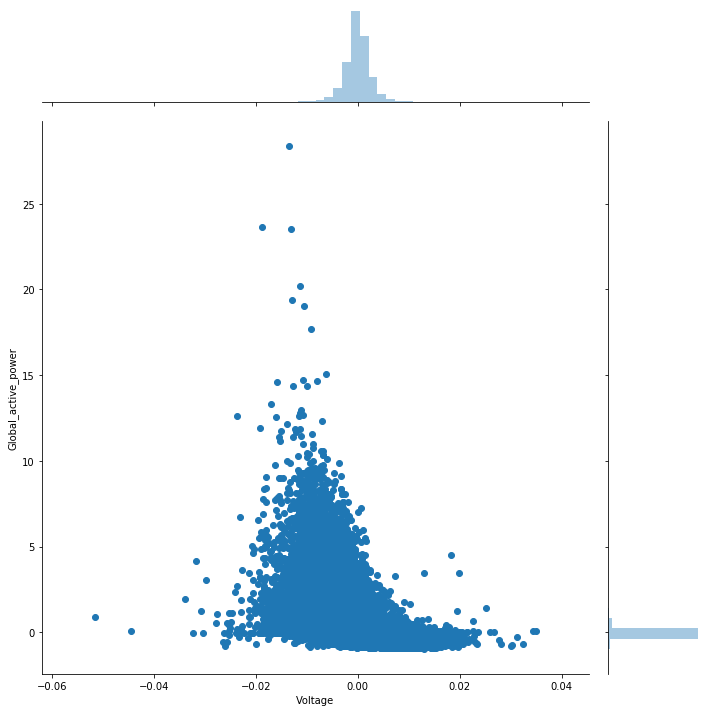

In [0]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns, height=10)  
plt.show()

* Global intensity and global active power are highly correlated 

In [0]:
def round_int(x):
    if x == float("inf") or x == float("-inf"):
        return float('nan') # or x or return whatever makes sense
    return int(round(x))

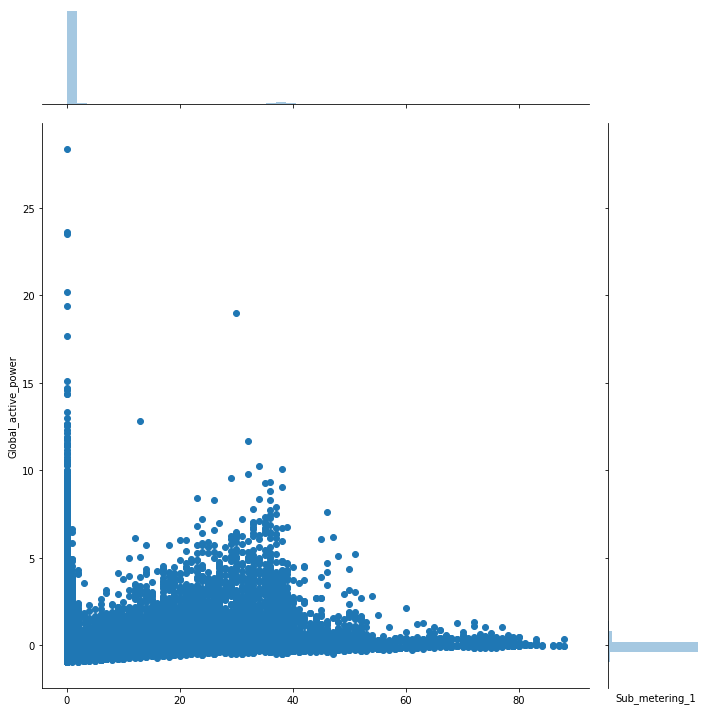

In [0]:

## The correlations between 'Sub_metering_1' and  'Global_active_power'
sns.jointplot(x=[round_int(i) for i in df['Sub_metering_1']], y='Global_active_power', data=data_returns, height=10)  
plt.xlabel('Sub_metering_1')
plt.show()

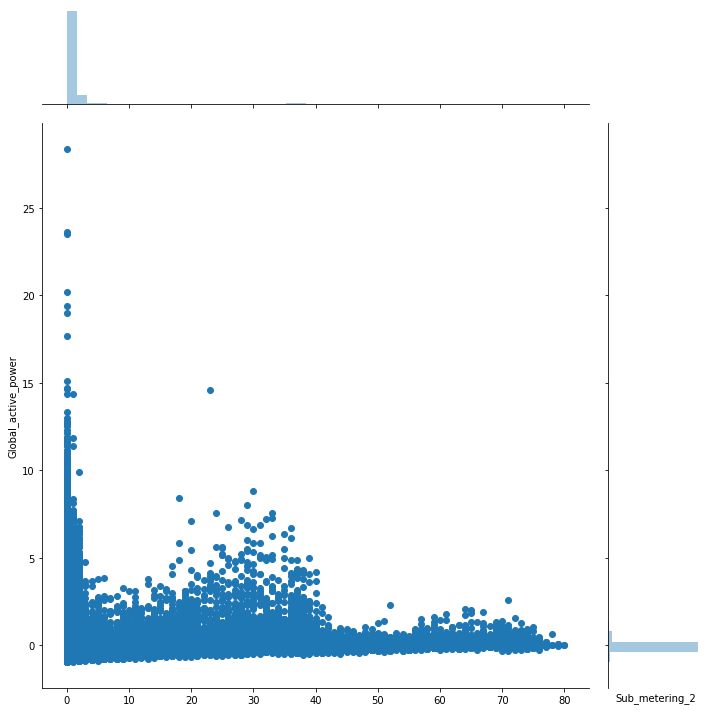

In [0]:
## The correlations between 'Sub_metering_2' and  'Global_active_power'
sns.jointplot(x=[round_int(i) for i in df['Sub_metering_2']], y='Global_active_power', data=data_returns, height=10)  
plt.xlabel('Sub_metering_2')
plt.show()

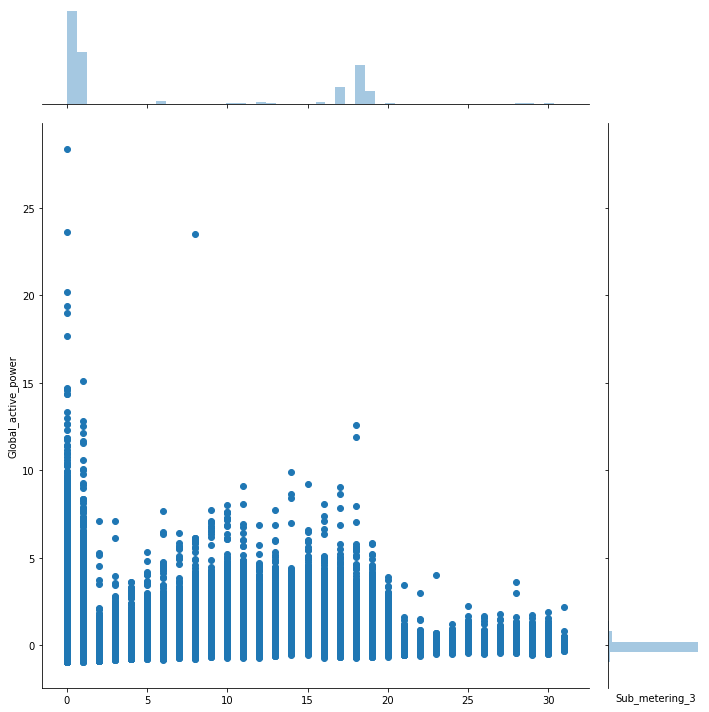

In [0]:
## The correlations between 'Sub_metering_2' and  'Global_active_power'
sns.jointplot(x=[round_int(i) for i in df['Sub_metering_3']], y='Global_active_power', data=data_returns, height=10)  
plt.xlabel('Sub_metering_3')
plt.show()

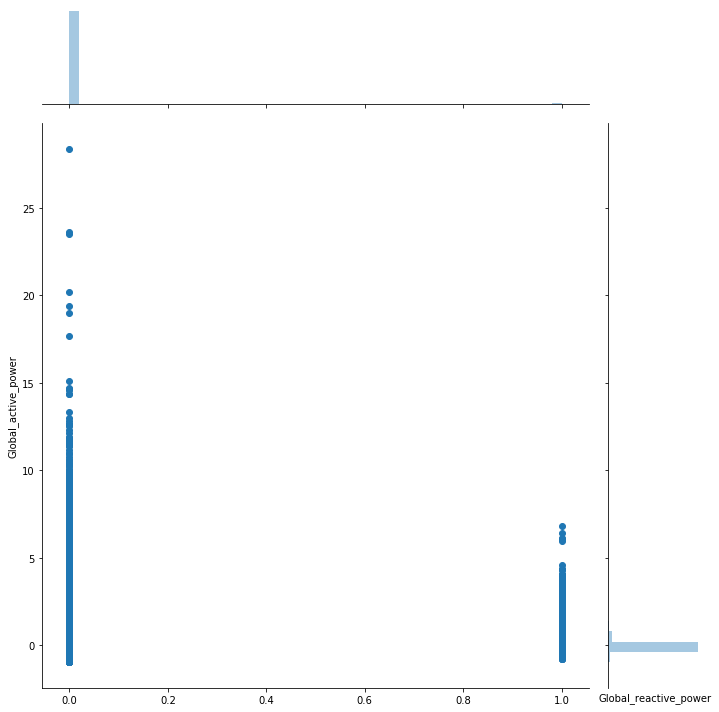

In [0]:
## The correlations between 'Sub_metering_2' and  'Global_active_power'
sns.jointplot(x=[round_int(i) for i in df['Global_reactive_power']], y='Global_active_power', data=data_returns, height=10)  
plt.xlabel('Global_reactive_power')
plt.show()

* From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated.

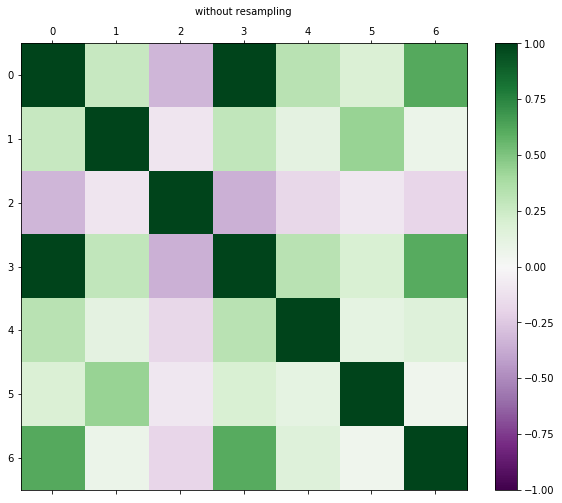

In [0]:
# Correlations among columns
matfig = plt.figure(figsize=(10,8))
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn', fignum=matfig.number)
plt.title('without resampling', size=10)
plt.colorbar()
plt.show()

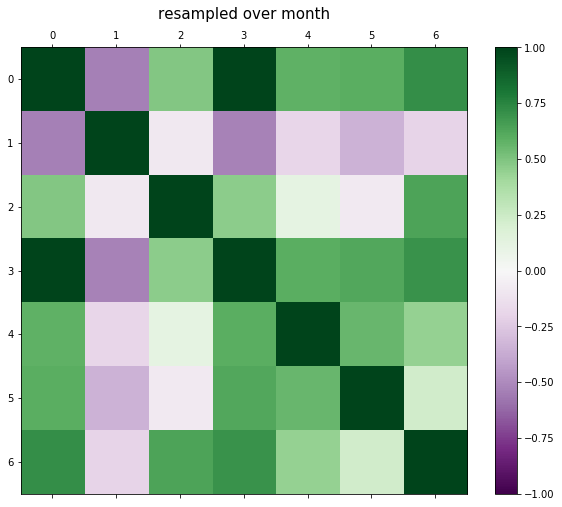

In [0]:
# Correlations of mean of features resampled over months

matfig = plt.figure(figsize=(10,8))
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn', fignum=matfig.number)
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)


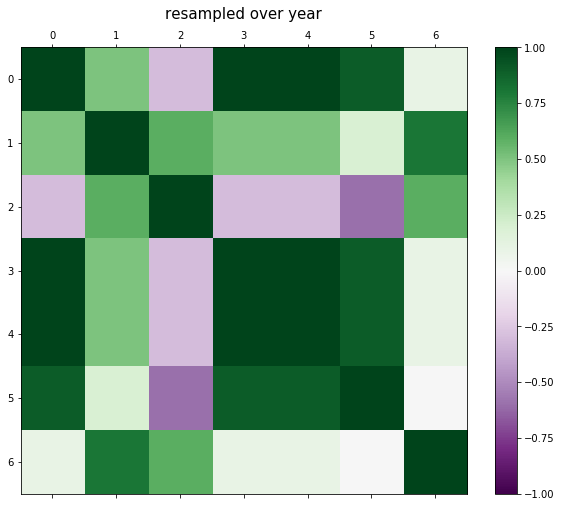

In [0]:
matfig = plt.figure(figsize=(10,8))
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn', fignum=matfig.number)
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

* We can see that col 0(Global_active_power) and col 3( Global_intensity) are very highly correlated
* We can see that col 0(Global_active_power) and col 6( Sub_metering_3) are also highly correlated
* We can see that col 0(Global_active_power) and col 2( Global_intensity) have very less correlation

# Feature Selection:

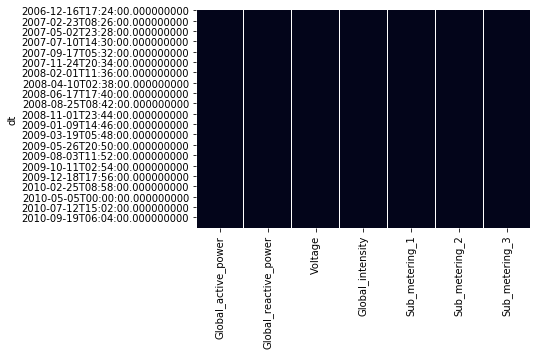

In [0]:
##VISUALISING MISSING VALUES
sns.heatmap(df.isnull(), cbar=False)


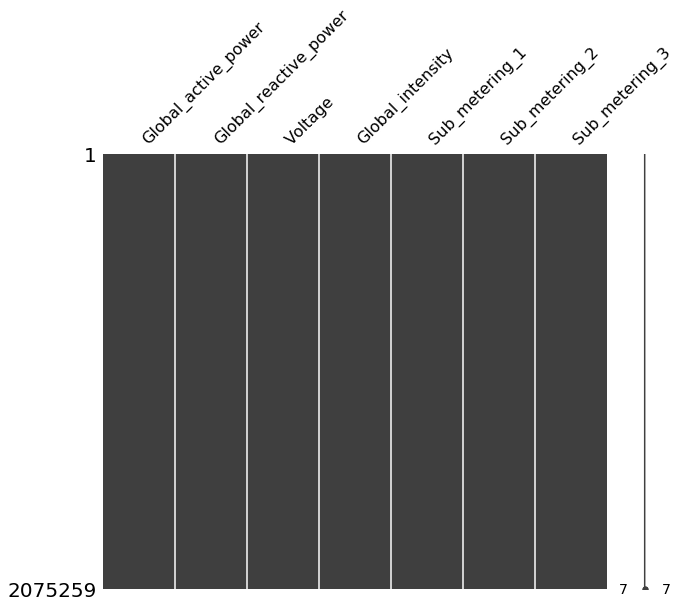

In [0]:
import missingno as msno
# Visualize missing values as a matrix 
msno.matrix(df, figsize=(10, 8)) 

* Thus there are no missing values.

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,2075259
Total Missing (%),0.0%
Total size in memory,126.7 MiB
Average record size in memory,64.0 B
Numeric,6
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1


## **Feature selection by correlation:**

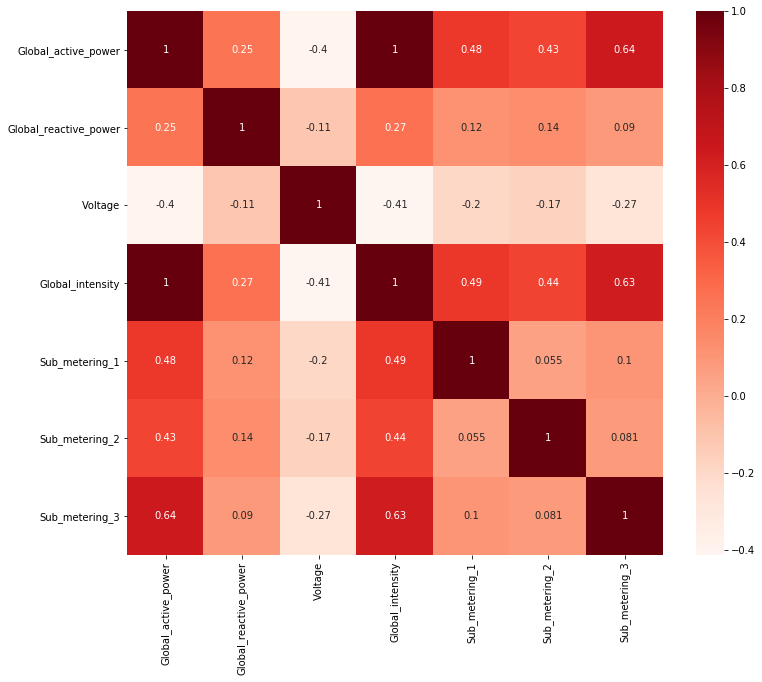

In [0]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

* Here we can see that voltage has the least corr coefficient compared to other variables

In [0]:
#Correlation with output variable
cor_target = abs(cor["Global_active_power"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

NameError: ignored

In [0]:
#check the correlation of selected features with each other
print(df[["Global_intensity","Sub_metering_3"]].corr())

                  Global_intensity  Sub_metering_3
Global_intensity          1.000000        0.626543
Sub_metering_3            0.626543        1.000000


In [0]:
!pip install tsfresh

     |████████████████████████████████| 81kB 2.7MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=bc6adf2f9f12bd7564d3d7c76b01a3769917563f74cdcaff2712837afd71eef8
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


In [0]:
"""from tsfresh import extract_relevant_features
y = df["Global_active_power"]          #Target Variable
X = extract_relevant_features(df, y, column_id='id', column_sort='ts')

print(X.info())
print(X.head())"""

In [0]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model=smf.ols('Global_active_power ~ Global_intensity+Global_reactive_power+Voltage+Sub_metering_1+Sub_metering_2+Sub_metering_3', data = df).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 2.340e+08
Date:                 Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                         06:45:48   Log-Likelihood:             3.7165e+06
No. Observations:              2075259   AIC:                        -7.433e+06
Df Residuals:                  2075252   BIC:                        -7.433e+06
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

In [0]:
"""## This chi square and select k best method for feature selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X= df[:df.shape[0]]
y=df.Global_active_power
bestfeatures = SelectKBest(score_func=chi2, k=all)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(5,'Score'))  #print 5 best features"""

# **LSTM**
## Goal - Predicting the **Global_active_power** at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [0]:
#Import libraries 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [0]:
#funtion to frame the supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

* In order to reduce the computation time, and also get a quick result to test the model. One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data

In [0]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [0]:
#scale all features in range of [0,1].

values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())



   var1(t-1)  var2(t-1)  var3(t-1)  ...  var6(t-1)  var7(t-1)   var1(t)
1   0.636816   0.295738   0.337945  ...   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.335501  ...   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.283802  ...   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.315987  ...   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.434417  ...   0.008973   0.798917  0.322555

[5 rows x 8 columns]


* There are 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current time in hour (depending on resampling).

In [0]:
# split into train and test sets
values = reframed.values

n_train_time = (365*24)*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(17520, 1, 7) (17520,) (17068, 1, 7) (17068,)


Model:

1) LSTM with 100 neurons in the first visible layer

3) dropout 20%

4) 1 neuron in the output layer for predicting Global_active_power.

5) The input shape will be 1 time step with 7 features.

6) Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

7) The model will be fit for 20 training epochs with a batch size of 60.

- The model can be improved by adjusting epochs and batch_size.



Train on 17520 samples, validate on 17068 samples
Epoch 1/20
 - 2s - loss: 0.0156 - val_loss: 0.0100
Epoch 2/20
 - 1s - loss: 0.0106 - val_loss: 0.0090
Epoch 3/20
 - 1s - loss: 0.0102 - val_loss: 0.0088
Epoch 4/20
 - 1s - loss: 0.0101 - val_loss: 0.0088
Epoch 5/20
 - 1s - loss: 0.0100 - val_loss: 0.0087
Epoch 6/20
 - 1s - loss: 0.0100 - val_loss: 0.0086
Epoch 7/20
 - 1s - loss: 0.0100 - val_loss: 0.0086
Epoch 8/20
 - 1s - loss: 0.0099 - val_loss: 0.0085
Epoch 9/20
 - 1s - loss: 0.0099 - val_loss: 0.0086
Epoch 10/20
 - 1s - loss: 0.0099 - val_loss: 0.0085
Epoch 11/20
 - 1s - loss: 0.0099 - val_loss: 0.0085
Epoch 12/20
 - 1s - loss: 0.0099 - val_loss: 0.0084
Epoch 13/20
 - 1s - loss: 0.0099 - val_loss: 0.0084
Epoch 14/20
 - 1s - loss: 0.0099 - val_loss: 0.0083
Epoch 15/20
 - 1s - loss: 0.0099 - val_loss: 0.0083
Epoch 16/20
 - 1s - loss: 0.0099 - val_loss: 0.0083
Epoch 17/20
 - 1s - loss: 0.0099 - val_loss: 0.0083
Epoch 18/20
 - 1s - loss: 0.0098 - val_loss: 0.0083
Epoch 19/20
 - 1s - los

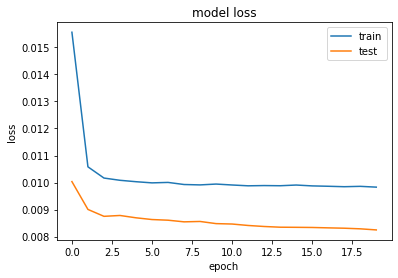

Test RMSE: 0.585


In [0]:


model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=60, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)



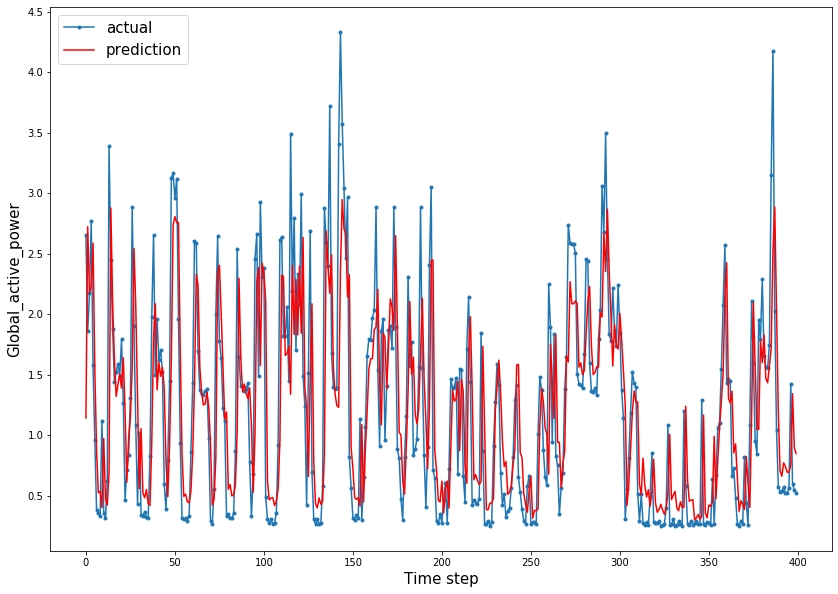

In [0]:
aa=[x for x in range(400)]
plt.figure(figsize=(14,10))
plt.plot(aa, inv_y[:400], marker='.', label="actual")
plt.plot(aa, inv_yhat[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()



In [0]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               43200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#future 60 days forecast
"""

pred_uc = model.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Global_active_power')
plt.legend()
plt.show()
"""


"\n\npred_uc = model.get_forecast(steps=60)\npred_ci = pred_uc.conf_int()\nax = y.plot(label='observed', figsize=(14, 7))\npred_uc.predicted_mean.plot(ax=ax, label='Forecast')\nax.fill_between(pred_ci.index,\n                pred_ci.iloc[:, 0],\n                pred_ci.iloc[:, 1], color='k', alpha=.25)\nax.set_xlabel('Date')\nax.set_ylabel('Global_active_power')\nplt.legend()\nplt.show()\n"